# The pyshtools Class Interface

pyshtools defines three major classes that simplify access to the underlying SHTOOLS functions:

* **SHCoeffs:** Spherical harmonic coefficients
* **SHGrid:** Gridded data on the sphere
* **SHWindows:** Multitaper windowing functions

The underlying data are stored in internal subclasses in different formats (e.g. `kind = 'real'` or `'complex'` and `grid = 'DH'` or `'GLQ'`). In this tutorial, we will demonstrate several aspects related to the `SHCoeffs` and `SHGrid` classes.

## Plot a single spherical harmonic function

The spherical harmonic coefficient class `SHCoeffs` can be initialized directly from a numpy array that holds the spherical harmonic coefficient data. Spherical harmonic coefficients are stored as a numpy array of dimension (2, lmax+1, lmax+1), where the first column corresponds to the cosine [0] and sine [1] components, the second column
corresponds to the spherical harmonic degree l, and the third column corresponds to the angular order m. To initialize the coefficients to be zero except for the l=5, m=2 harmonic, we first create a numpy array of the coefficients:

In [1]:
%matplotlib inline
from __future__ import print_function # only necessary if using Python 2.x

import matplotlib.pyplot as plt
import numpy as np
from pyshtools.shclasses import SHCoeffs, SHGrid, SHWindow

nl = 201
coeffs = np.zeros((2, nl, nl))
coeffs[0, 5, 2] = 1.

To initialize a new class instance, we make use of the method `from_array()`:

In [2]:
coeffs_l5m2 = SHCoeffs.from_array(coeffs)

When initializing a new class instance, the default is to assume that the input coefficients are 4-pi normalized excluding the Condon-Shortley phase. The normalization convention can be overridden by setting the optional parameter 'normalization', which can be '4pi', 'ortho' or 'schmidt', along with the parameter 'csphase', which can be 1 (to exclude the Condon-Shortley phase) or -1 (to include it). The `SHCoeffs` class contains many methods, and here we use `plot_spectrum()` to plot the power spectrum: 

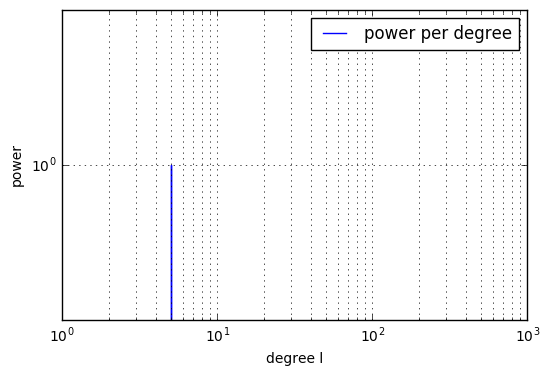

In [3]:
fig, ax = coeffs_l5m2.plot_spectrum(xscale='log')

To plot the function that corresponds to the coefficients, we first need to expand it on a grid, which can be accomplished using the `expand()` method:

In [4]:
grid_l5m2 = coeffs_l5m2.expand('DH2')

This returns a new SHGrid class instance. The resolution of the grid is determined automatically to correspond to the maximum degree of the spherical harmonic coefficients in order to ensure good sampling. The optional parameter 'grid' can be: 'DH2' for a Driscoll and Healy sampled grid with nlon = 2 * nlat, 'DH' for a Driscol and Healy sampled grid with nlon = nlat, or 'GLQ' for a grid used with the Gauss-Legendre quadrature expansion routines. Once the grid is created, it can be plotted using the built-in method `plot()`.

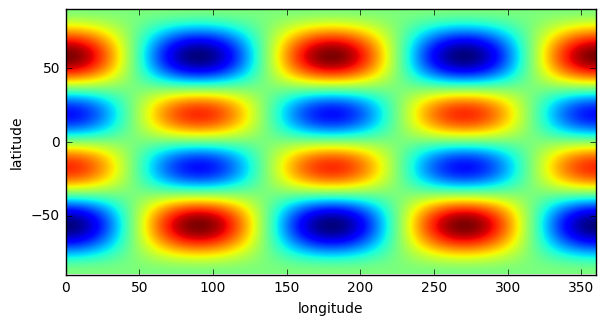

In [5]:
fig, ax = grid_l5m2.plot()

## Initialize with a random model

Another constructor for the `SHCoeffs` class is the `from_random()` method. It takes a power spectrum (power per degree l of the coefficients) and generates coefficients that are independent normal distributed random variables with the provided expected power spectrum. This corresponds to a stationary and isotropic random model on the surface of the sphere whose autocorrelation function is given by the spherical harmonic addition theorem.

We initialize coefficients here with a scale-free power spectrum that has equal band power beyond the scale length that defines the size of the largest model features. The particular property of this model is that it is invariant under zoom operations.

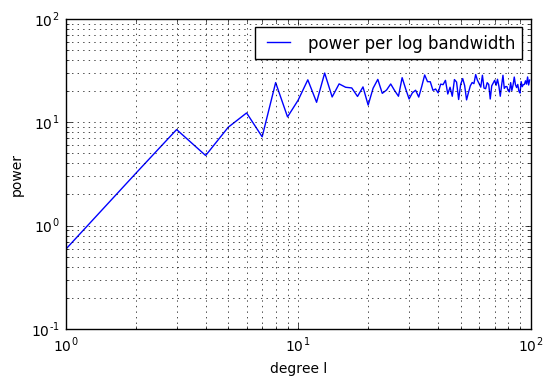

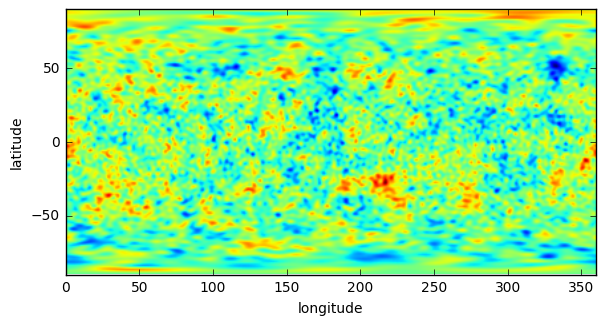

In [6]:
nl = 100  # l = [0, 199]
lmax = nl - 1
a = 10  # scale length
ls = np.arange(nl, dtype=np.float)
power = 1. / (1. + (ls / a) ** 2) ** 0.5

coeffs_global = SHCoeffs.from_random(power)

fig, ax = coeffs_global.plot_spectrum(unit='per_dlogl', xscale='log')
fig, ax = coeffs_global.expand('DH2').plot()

## Rotating the coordinate system

Spherical harmonics coefficients can be expressed in a different coordinate system very efficiently. Importantly, the power per degree spectrum is invariant under rotation. While the degree l controls the wavevector magnitude, it is the order m that defines the orientation of the spherical harmonics. We demonstrate this by rotating a zonal spherical harmonic (m=0) that is centered about the north-pole to the equator.

The rotations are specified by the three Euler angles `alpha`, `beta`, and `gamma`. There are several different conventions for specifying these angles, and they can either provide the angles for rotating the physical body or coordinate system. Please read the documentation of this method before proceeding!

In this example, we use the constructor `from_zeros()`, and then use the method `set_coeffs()` to initialize the single spherical harmonic coefficient:

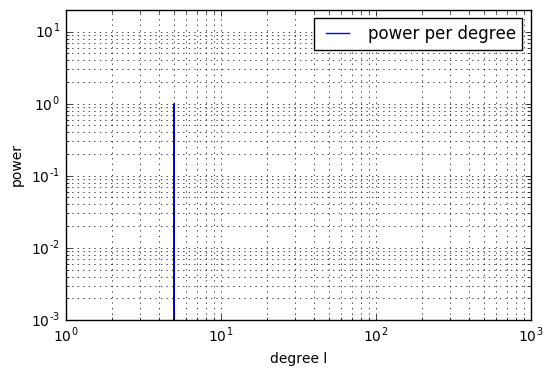

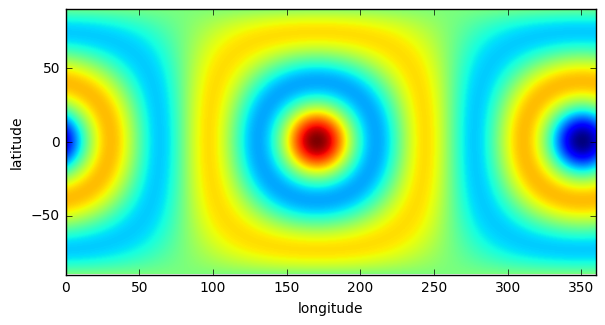

In [7]:
lmax = 200
coeffs_l5m0 = SHCoeffs.from_zeros(lmax)
coeffs_l5m0.set_coeffs(1., 5, 0)

alpha = 0.  # around z-axis
beta = 90.  # around x-axis (lon=0)
gamma = 10.  # around z-axis again

coeffs_l5m0_rot = coeffs_l5m0.rotate(alpha, beta, gamma, degrees=True)

fig, ax = coeffs_l5m0_rot.plot_spectrum(xscale='log', show=False)
ax.set(ylim=[0.001,20])

grid_l5m0_rot = coeffs_l5m0_rot.expand('DH2')
fig, ax = grid_l5m0_rot.plot()

## Addition, multiplication, and subtraction

Similar grids can be added, multiplied and subtracted using the standard python operators. It is easily verified that the following operations return the same rotated grid as above:

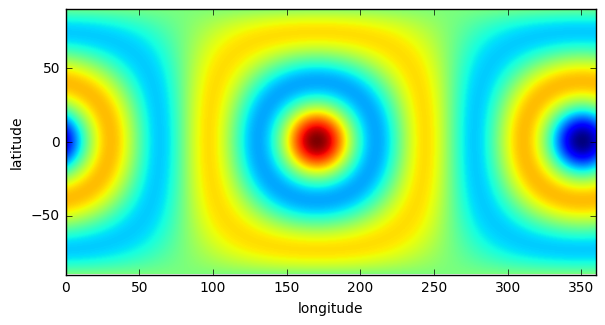

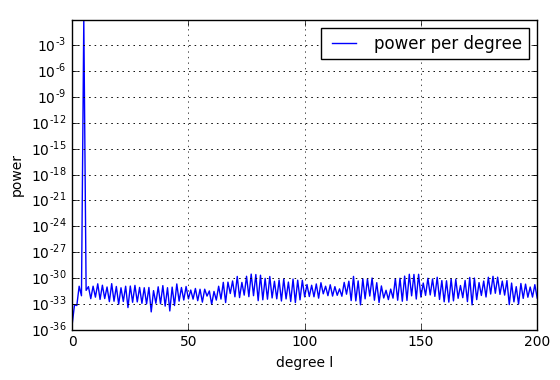

In [8]:
grid_new = (2*grid_l5m0_rot + grid_l5m2**2 - grid_l5m2*grid_l5m2)/2.0
grid_new.plot()

coeffs = grid_new.expand()
fig, ax = coeffs.plot_spectrum()